# Text detection and extraction using OpenCV and Tesseract-OCR.

This notebook is for me to understand more about OpenCV and Tesseract-OCR.

## 1. Importing Necessary Library

Install library into python virtual environment

In [1]:
!pip install opencv-python
!pip install pytesseract
!pip install matplotlib

In [2]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Path to tesseract executable OCR engine
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

## Get the image

We take the image and grayscale it for the thresholding process later, as thresholding will take on binary value instead of RGB three channel.

In [ ]:
image_path = "sample.png" # Image Source: https://www.csusm.edu/iits/services/accessibility/guides/scanquality.html
image = cv2.imread(image_path)

# Convert BGR to Grayscale (as OpenCV uses BGR by default)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Apply Thresholding

In [4]:
# Apply thresholding to get a binary image
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)


## Dilation

Kernel determines the size of operation for morphological operation which in this case is dilation. Dilation will expand the white spaces in a binary image, to better classify detected shapes into groups.

In [5]:
# Specify kernel size
# Kernel big = more pixels (Detect sentences, paragraphs)
# Kernel small = less pixels (Detect words)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))

# Dilation to connect text regions
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

To understand what does it means by expanding white spaces, here is the example.

### When kernel = (6,6)

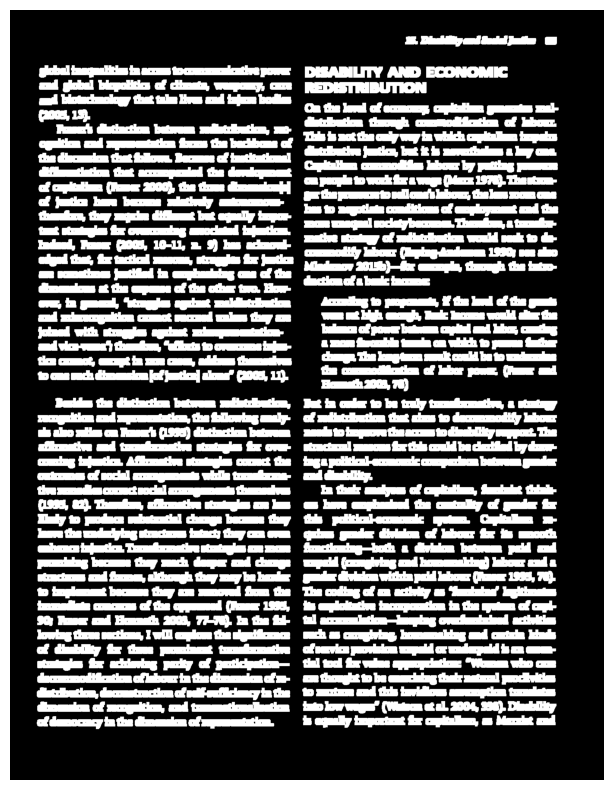

In [6]:
# Display the dilated white areas
plt.figure(figsize=(10,10))
plt.imshow(dilation, cmap='gray')
plt.axis('off')
plt.show()

### When kernel = (18,18)

In [7]:
# Specify kernel size
# Kernel big = more pixels (Detect sentences, paragraphs)
# Kernel small = less pixels (Detect words)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# Dilation to connect text regions
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

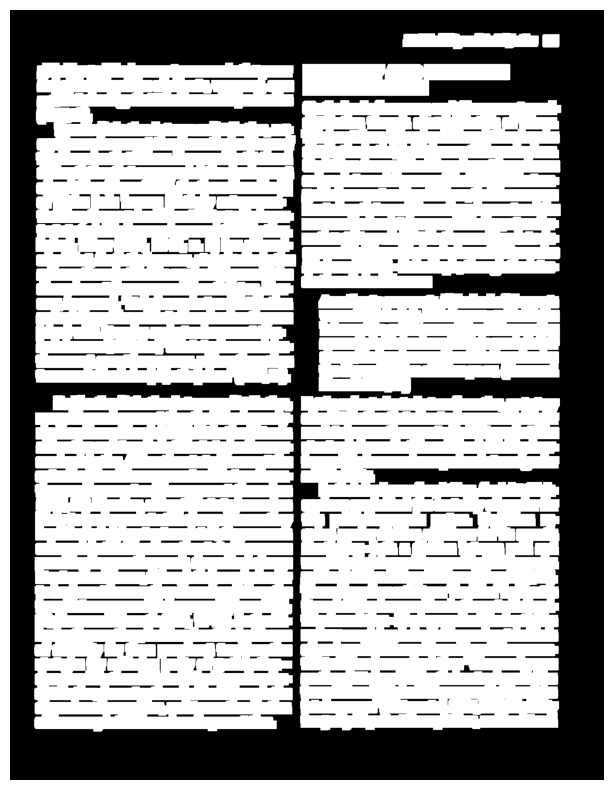

In [8]:
# Display the dilated white areas
plt.figure(figsize=(10,10))
plt.imshow(dilation, cmap='gray')
plt.axis('off')
plt.show()

## Find Contours

Contours are boundaries. We get the text groups from the dilated binary image using cv2.findContours. Then, we cropped out the boundaries from the image, and change the image to text contour by contour using Tesseract OCR.

In [9]:
# Find contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# mode = how to retrieve contours
# method = how to approximate the contours

img2 = image.copy()

# Larger kernel = more pixels, less contours, smaller number of loops
print(f"Number of contours found = {len(contours)}\n")

for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cropped = img2[y:y + h + 10, x:x + w + 10]
  text = pytesseract.image_to_string(cropped)
  print(text)

Number of contours found = 8

But in order to be truly transformative, a strategy
of redistribution that aims to decommodify labour
needs to improve the access to disability support. The

structural reasons for this could be clarified by draw-
ing a political-economic comparison between gender
and disability.

In their analyses of capitalism, feminist think-
ers have emphasised the centrality of gender for
this political-economic system. Capitalism re-
quires gender division of labour for its smooth
functioning—both a division between paid and
unpaid {caregiving and homemaking) labour and a
gender division within paid labour (Fraser 1995, 78).
The coding of an activity as ‘feminine’ legitimates
its exploitative incorporation in the system of capi-
tal accumulation—keeping overfeminised activities
such as caregiving, homemaking and certain kinds
of service provision unpaid or underpaid is an essen-
tial tool for value appropriation: “Women who care
are thought to be exercising their nat

## Show the boundaries

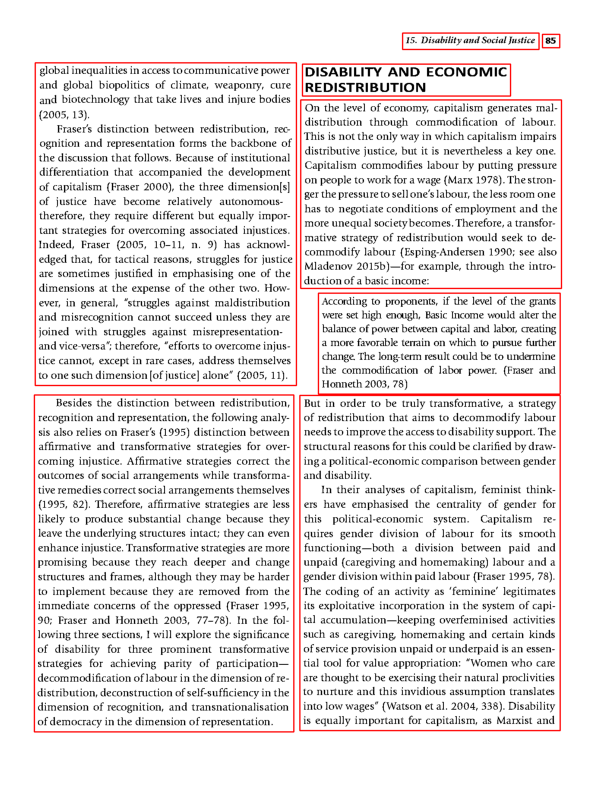

In [10]:
# Display the image with 8 bounding boxes as contours = 8
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()